# import all libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import cufflinks as cf
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
from chart_studio.plotly import iplot

# Upload a dataset

In [3]:
df=pd.read_csv(r'C:\Users\Saabia\Desktop\CPCPro\DS_excel_files\titanic.csv')

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.groupby('sex').describe().T

sex                 female        male
survived count  314.000000  577.000000
         mean     0.742038    0.188908
         std      0.438211    0.391775
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      1.000000    0.000000
         75%      1.000000    0.000000
         max      1.000000    1.000000
pclass   count  314.000000  577.000000
         mean     2.159236    2.389948
         std      0.857290    0.813580
         min      1.000000    1.000000
         25%      1.000000    2.000000
         50%      2.000000    3.000000
         75%      3.000000    3.000000
         max      3.000000    3.000000
age      count  261.000000  453.000000
         mean    27.915709   30.726645
         std     14.110146   14.678201
         min      0.750000    0.420000
         25%     18.000000   21.000000
         50%     27.000000   29.000000
         75%     37.000000   39.000000
         max     63.000000   80.000000
sibsp    count  314.000000  577.000000
         mean     0.694268    0.429809
         std      1.156520    1.061811
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      0.000000    0.000000
         75%      1.000000    0.000000
         max      8.000000    8.000000
parch    count  314.000000  577.000000
         mean     0.649682    0.235702
         std      1.022846    0.612294
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      0.000000    0.000000
         75%      1.000000    0.000000
         max      6.000000    5.000000
fare     count  314.000000  577.000000
         mean    44.479818   25.523893
         std     57.997698   43.138263
         min      6.750000    0.000000
         25%     12.071875    7.895800
         50%     23.000000   10.500000
         75%     55.000000   26.550000
         max    512.329200  512.329200

In [8]:
df.groupby('sex')[['class','who','adult_male','deck','embark_town','alive','alone']].describe().T

sex                      female         male
class       count           314          577
            unique            3            3
            top           Third        Third
            freq            144          347
who         count           314          577
            unique            2            2
            top           woman          man
            freq            271          537
adult_male  count           314          577
            unique            1            2
            top           False         True
            freq            314          537
deck        count            97          106
            unique            7            6
            top               C            C
            freq             27           32
embark_town count           312          577
            unique            3            3
            top     Southampton  Southampton
            freq            203          441
alive       count           314          577
            unique            2            2
            top             yes           no
            freq            233          468
alone       count           314          577
            unique            2            2
            top           False         True
            freq            188          411

# Correlation

In [9]:
correlation=df.describe().corr()
correlation

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,0.999997,0.995506,0.999971,0.999983,0.854290
pclass,0.999997,1.000000,0.995603,0.999969,0.999981,0.854411
age,0.995506,0.995603,1.000000,0.996106,0.995928,0.894249
sibsp,0.999971,0.999969,0.996106,1.000000,0.999998,0.858250
parch,0.999983,0.999981,0.995928,0.999998,1.000000,0.857221
fare,0.854290,0.854411,0.894249,0.858250,0.857221,1.000000


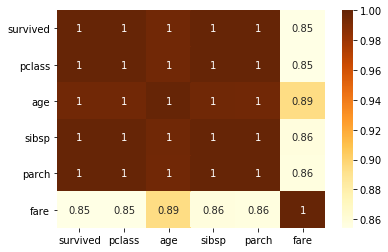

In [10]:
sns.heatmap(correlation, cmap='YlOrBr', annot=True)

In [11]:
df['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [12]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [13]:
df.groupby('sex')['who'].value_counts()

sex     who  
female  woman    271
        child     43
male    man      537
        child     40
Name: who, dtype: int64

In [14]:
df.groupby('sex')['survived'].value_counts()

sex     survived
female  1           233
        0            81
male    0           468
        1           109
Name: survived, dtype: int64

In [15]:
df.groupby('sex')['alive'].value_counts()

sex     alive
female  yes      233
        no        81
male    no       468
        yes      109
Name: alive, dtype: int64

In [16]:
df.groupby('who')['alive'].value_counts()

who    alive
child  yes       49
       no        34
man    no       449
       yes       88
woman  yes      205
       no        66
Name: alive, dtype: int64

In [17]:
df.groupby('sex')['alone'].value_counts()

sex     alone
female  False    188
        True     126
male    True     411
        False    166
Name: alone, dtype: int64

In [18]:
df['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [19]:
df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [20]:
df.groupby('sex')['pclass'].value_counts()

sex     pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: pclass, dtype: int64

In [21]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# Graphical Representation on the basis of different factors

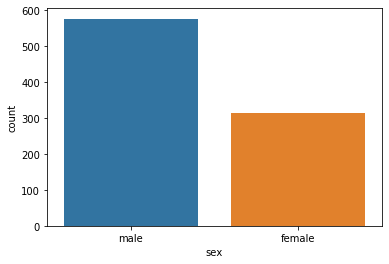

In [22]:
sns.countplot(x='sex',data=df)

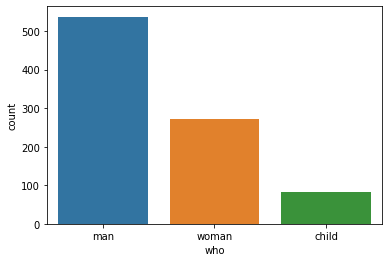

In [23]:
sns.countplot(x='who',data=df)

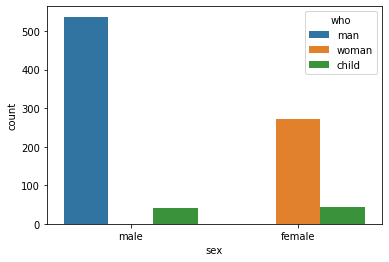

In [24]:
sns.countplot(x='sex',hue='who',data=df)

In [25]:
df['age'].max()

80.0

In [26]:
df['age'].min()

0.42

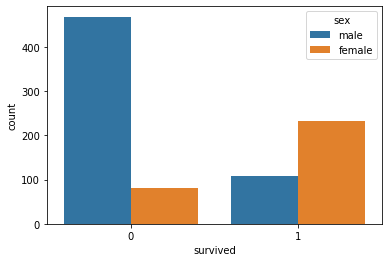

In [27]:
sns.countplot(x='survived',hue='sex',data=df)

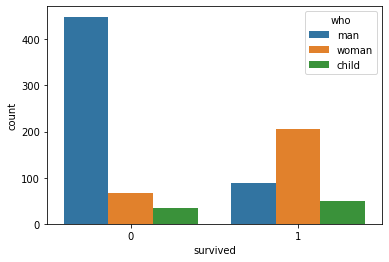

In [28]:
sns.countplot(x='survived',hue='who',data=df)

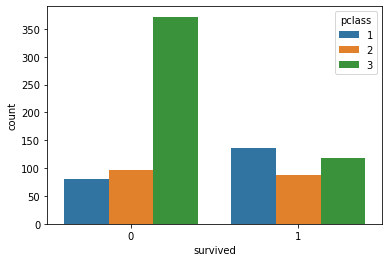

In [29]:
sns.countplot(x='survived',hue='pclass',data=df)

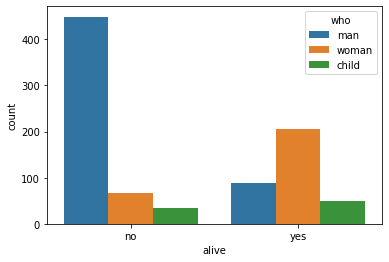

In [30]:
sns.countplot(x='alive',  hue='who', data=df)

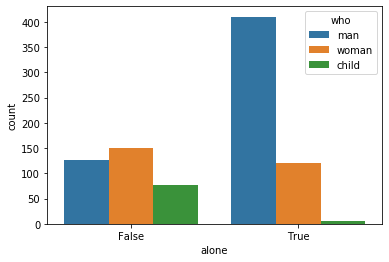

In [31]:
sns.countplot(x='alone',  hue='who', data=df)

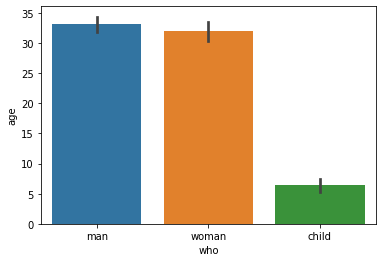

In [32]:
sns.barplot(x='who',y='age',data=df)

C:\Users\Saabia\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



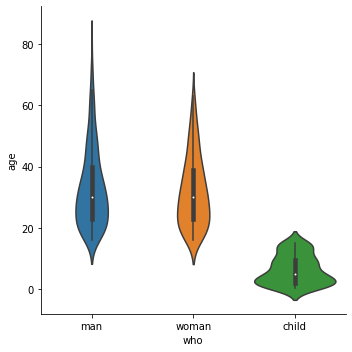

In [33]:
sns.factorplot(x='who',y='age',data=df, kind='violin')

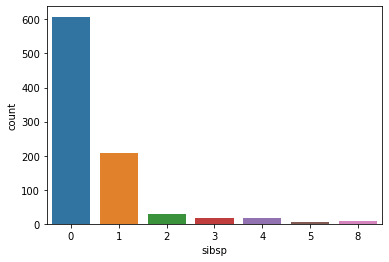

In [34]:
sns.countplot(x='sibsp', data=df,)

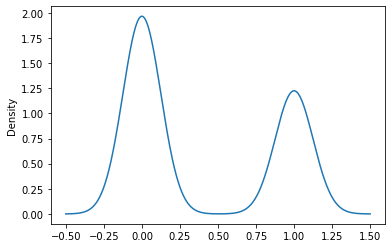

In [35]:
df['survived'].plot.density()

In [36]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

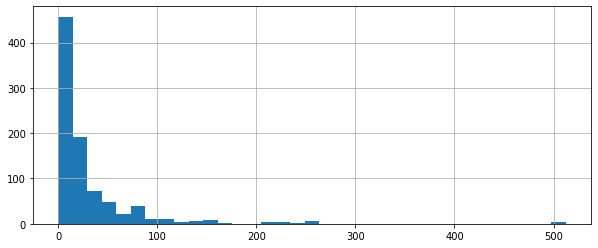

In [37]:
df['fare'].hist(bins=35, figsize=(10,4))

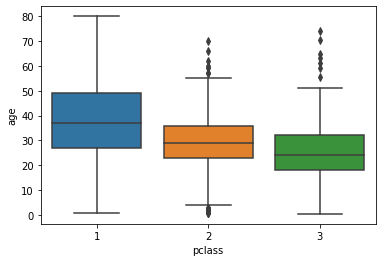

In [38]:
sns.boxplot(x='pclass', y='age', data=df)

In [39]:
#Graphical representation

In [40]:
df['fare'].iplot(kind='hist', bins=40)

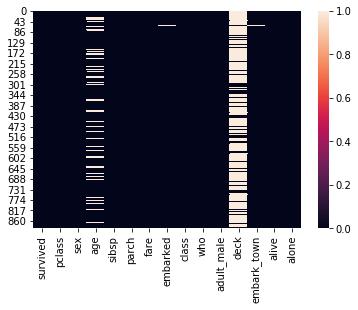

In [41]:
sns.heatmap(pd.isnull(df))

In [42]:
df.drop('deck',axis=1,inplace=True)

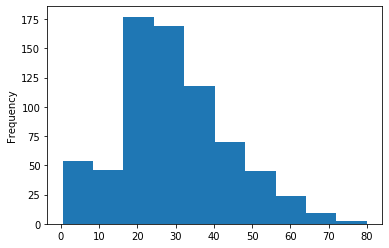

In [43]:
df['age'].plot.hist()

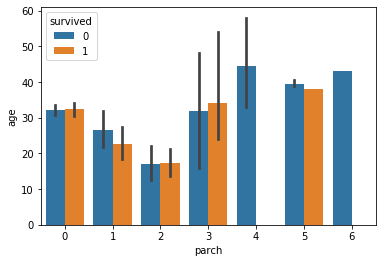

In [44]:
sns.barplot(x='parch', y='age', data=df, hue='survived')

# Drop and Fill Missing values 

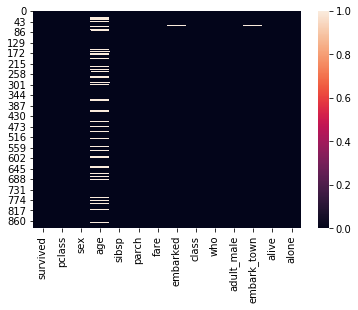

In [45]:
sns.heatmap(df.isnull())

In [46]:
df['age'].fillna(df['age'].mean(),inplace=True)

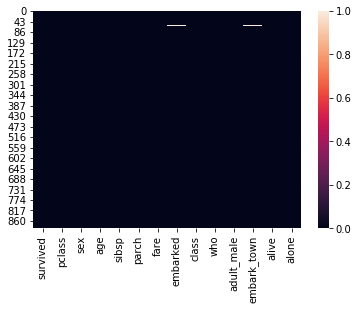

In [47]:
sns.heatmap(df.isnull())

In [48]:
df.dropna(inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          889 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   embarked     889 non-null    object 
 8   class        889 non-null    object 
 9   who          889 non-null    object 
 10  adult_male   889 non-null    bool   
 11  embark_town  889 non-null    object 
 12  alive        889 non-null    object 
 13  alone        889 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 92.0+ KB


# Data Cleaning

In [50]:
df.drop(['class','adult_male','embark_town','who','alive'], axis=1, inplace=True)

In [51]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.000000,1,0,7.2500,S,False
1,1,1,female,38.000000,1,0,71.2833,C,False
2,1,3,female,26.000000,0,0,7.9250,S,True
3,1,1,female,35.000000,1,0,53.1000,S,False
4,0,3,male,35.000000,0,0,8.0500,S,True
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,True
887,1,1,female,19.000000,0,0,30.0000,S,True
888,0,3,female,29.699118,1,2,23.4500,S,False
889,1,1,male,26.000000,0,0,30.0000,C,True


In [52]:
df['alone'].replace({False:0,True:1},inplace=True)

In [53]:
Sex=pd.get_dummies(df['sex'], drop_first=True)

In [54]:
Sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [55]:
embark=pd.get_dummies(df['embarked'],drop_first=True)

In [56]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [57]:
df=pd.concat([df, Sex, embark], axis=1)

In [58]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,1,0,1


In [59]:
df.drop(['sex','embarked'], axis=1, inplace=True)

In [60]:
df.drop(['alone'], axis=1, inplace=True)

In [61]:
df.head()

,survived,pclass,age,sibsp,parch,fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


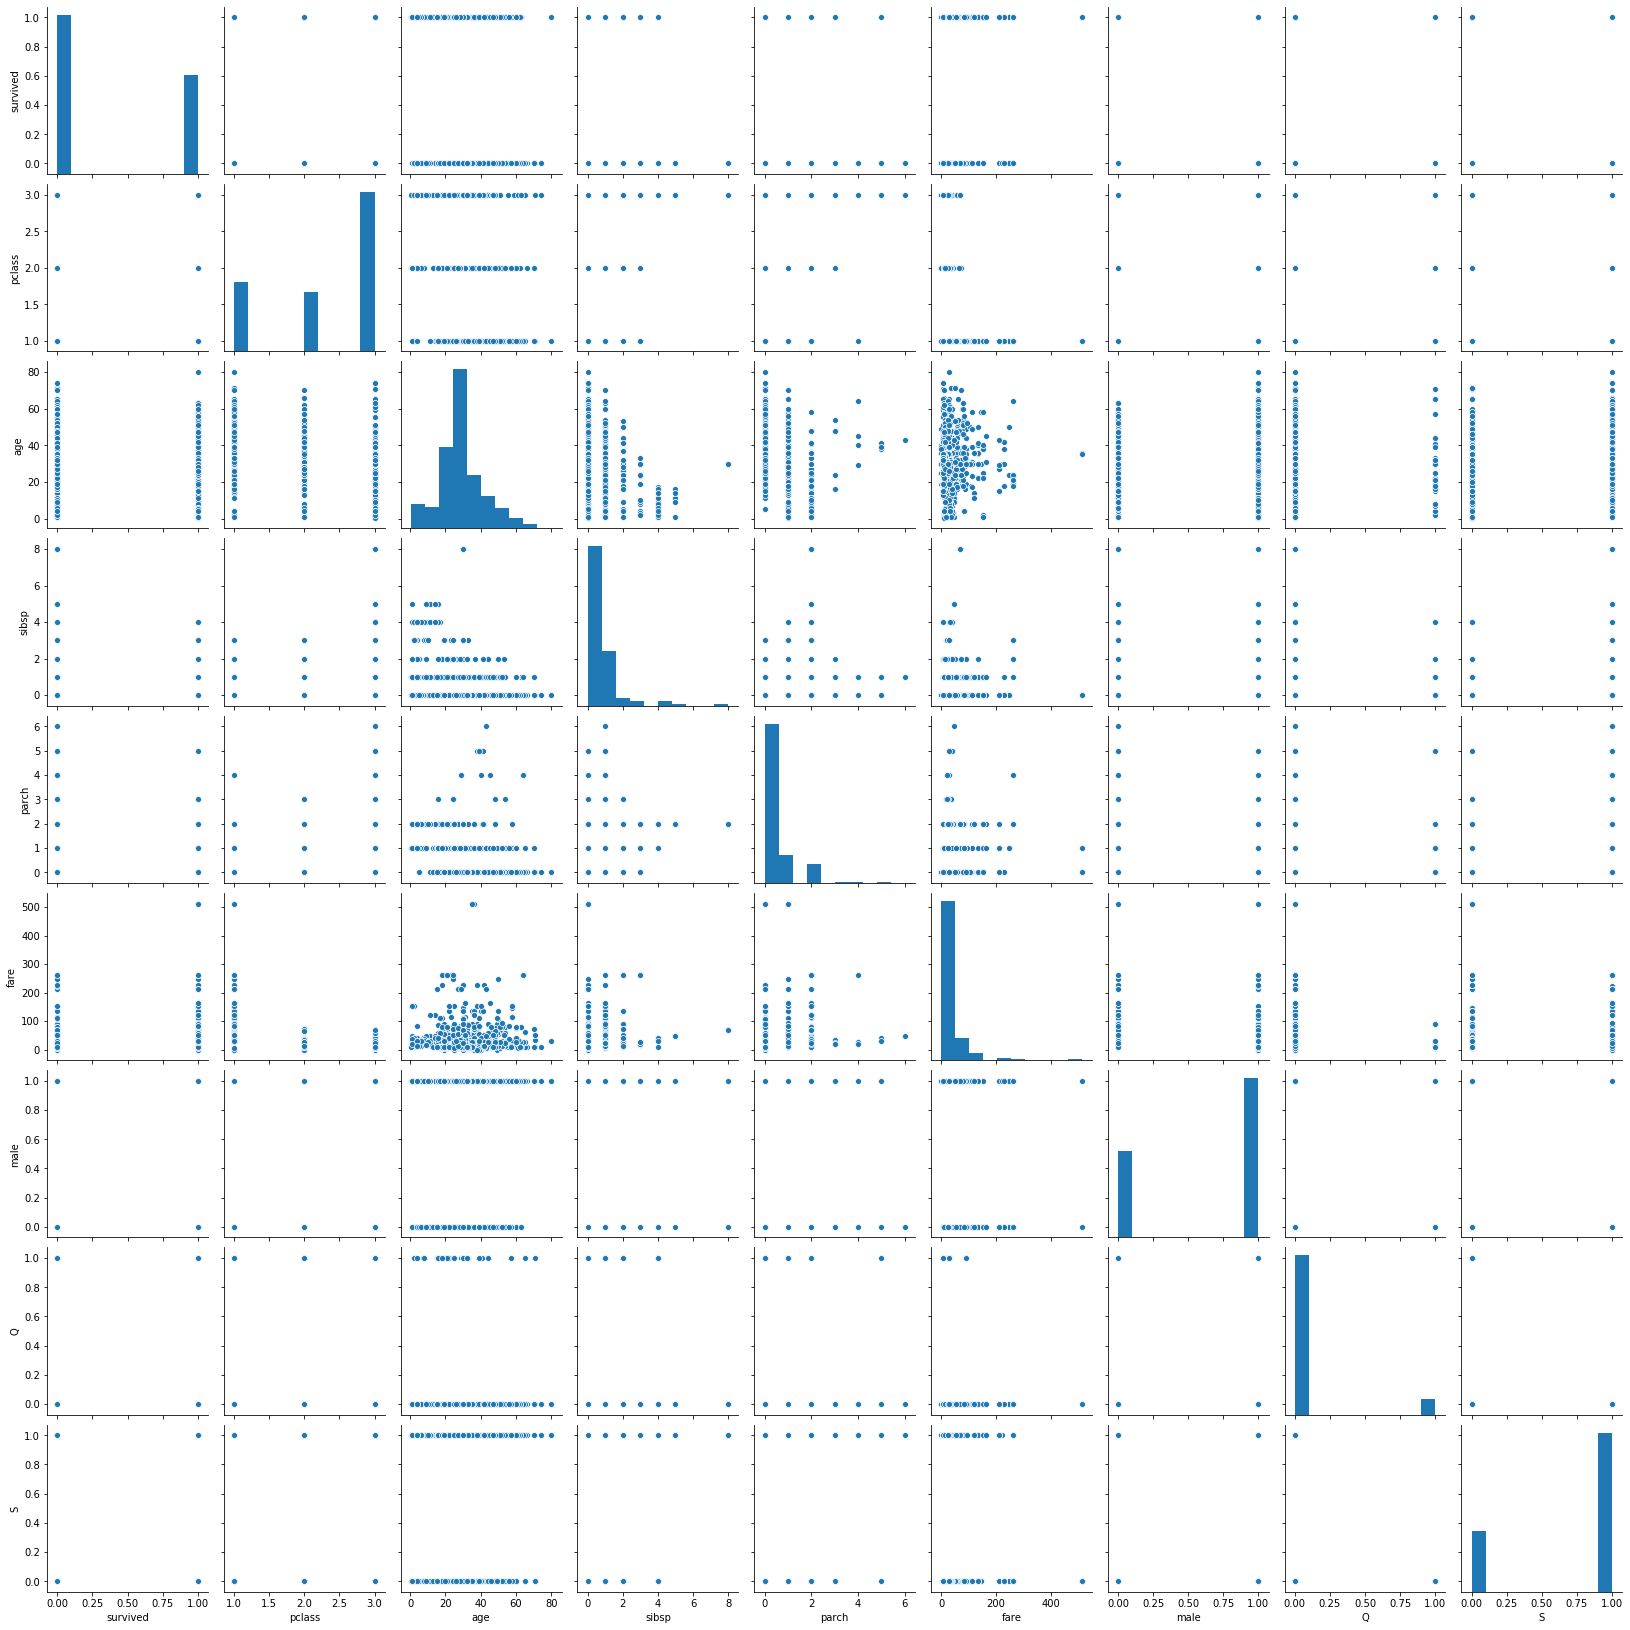

In [62]:
sns.pairplot(df)

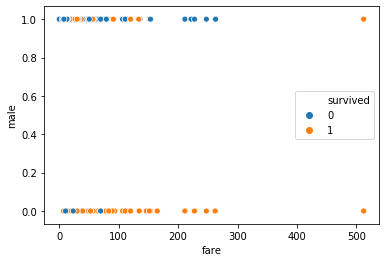

In [100]:
# Almost all female survived whoose Fare>30
sns.scatterplot(x='fare',y='male',hue='survived',data=df)
plt.show()

In [63]:
df.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'male', 'Q',
       'S'],
      dtype='object')

# Predictions

# Split data into train and test

In [64]:
x=df[['pclass', 'age', 'sibsp', 'parch', 'fare', 'male', 'Q','S']]
y=df['survived']

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

In [67]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622 entries, 807 to 865
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  622 non-null    int64  
 1   age     622 non-null    float64
 2   sibsp   622 non-null    int64  
 3   parch   622 non-null    int64  
 4   fare    622 non-null    float64
 5   male    622 non-null    uint8  
 6   Q       622 non-null    uint8  
 7   S       622 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 31.0 KB


In [68]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 511 to 634
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  267 non-null    int64  
 1   age     267 non-null    float64
 2   sibsp   267 non-null    int64  
 3   parch   267 non-null    int64  
 4   fare    267 non-null    float64
 5   male    267 non-null    uint8  
 6   Q       267 non-null    uint8  
 7   S       267 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 13.3 KB


# Logistic Regression Algorithm

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
logmodel = LogisticRegression()

In [72]:
logmodel.fit(x_train,y_train)

C:\Users\Saabia\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
predictions=logmodel.predict(x_test)

In [74]:
from sklearn.metrics import classification_report

In [75]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267



In [76]:
from sklearn.metrics import confusion_matrix

In [77]:
print(confusion_matrix(y_test, predictions))

[[149  14]
 [ 33  71]]


In [78]:
logmodel.score(x_test,y_test)

0.8239700374531835

# Split data into train test

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x=df[['pclass', 'age', 'sibsp', 'parch', 'fare', 'male', 'Q','S']]
y=df['survived']

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

In [84]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622 entries, 807 to 865
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  622 non-null    int64  
 1   age     622 non-null    float64
 2   sibsp   622 non-null    int64  
 3   parch   622 non-null    int64  
 4   fare    622 non-null    float64
 5   male    622 non-null    uint8  
 6   Q       622 non-null    uint8  
 7   S       622 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 31.0 KB


In [85]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 511 to 634
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  267 non-null    int64  
 1   age     267 non-null    float64
 2   sibsp   267 non-null    int64  
 3   parch   267 non-null    int64  
 4   fare    267 non-null    float64
 5   male    267 non-null    uint8  
 6   Q       267 non-null    uint8  
 7   S       267 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 13.3 KB


# Decision Tree 

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
dtree=DecisionTreeClassifier()

In [88]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [89]:
predictions=dtree.predict(x_test)

In [90]:
from sklearn.metrics import classification_report, confusion_matrix

In [91]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[131  32]
 [ 33  71]]


              precision    recall  f1-score   support

           0       0.80      0.80      0.80       163
           1       0.69      0.68      0.69       104

    accuracy                           0.76       267
   macro avg       0.74      0.74      0.74       267
weighted avg       0.76      0.76      0.76       267



# 

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
rfc = RandomForestClassifier(n_estimators=200)

In [94]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [95]:
rfc_pred=rfc.predict(x_test)

In [96]:
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

[[140  23]
 [ 30  74]]


              precision    recall  f1-score   support

           0       0.82      0.86      0.84       163
           1       0.76      0.71      0.74       104

    accuracy                           0.80       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267



In [97]:
df['survived'].value_counts()

0    549
1    340
Name: survived, dtype: int64

In [98]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

C:\Users\Saabia\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



['pclass', 'age', 'sibsp', 'parch', 'fare', 'male', 'Q', 'S']

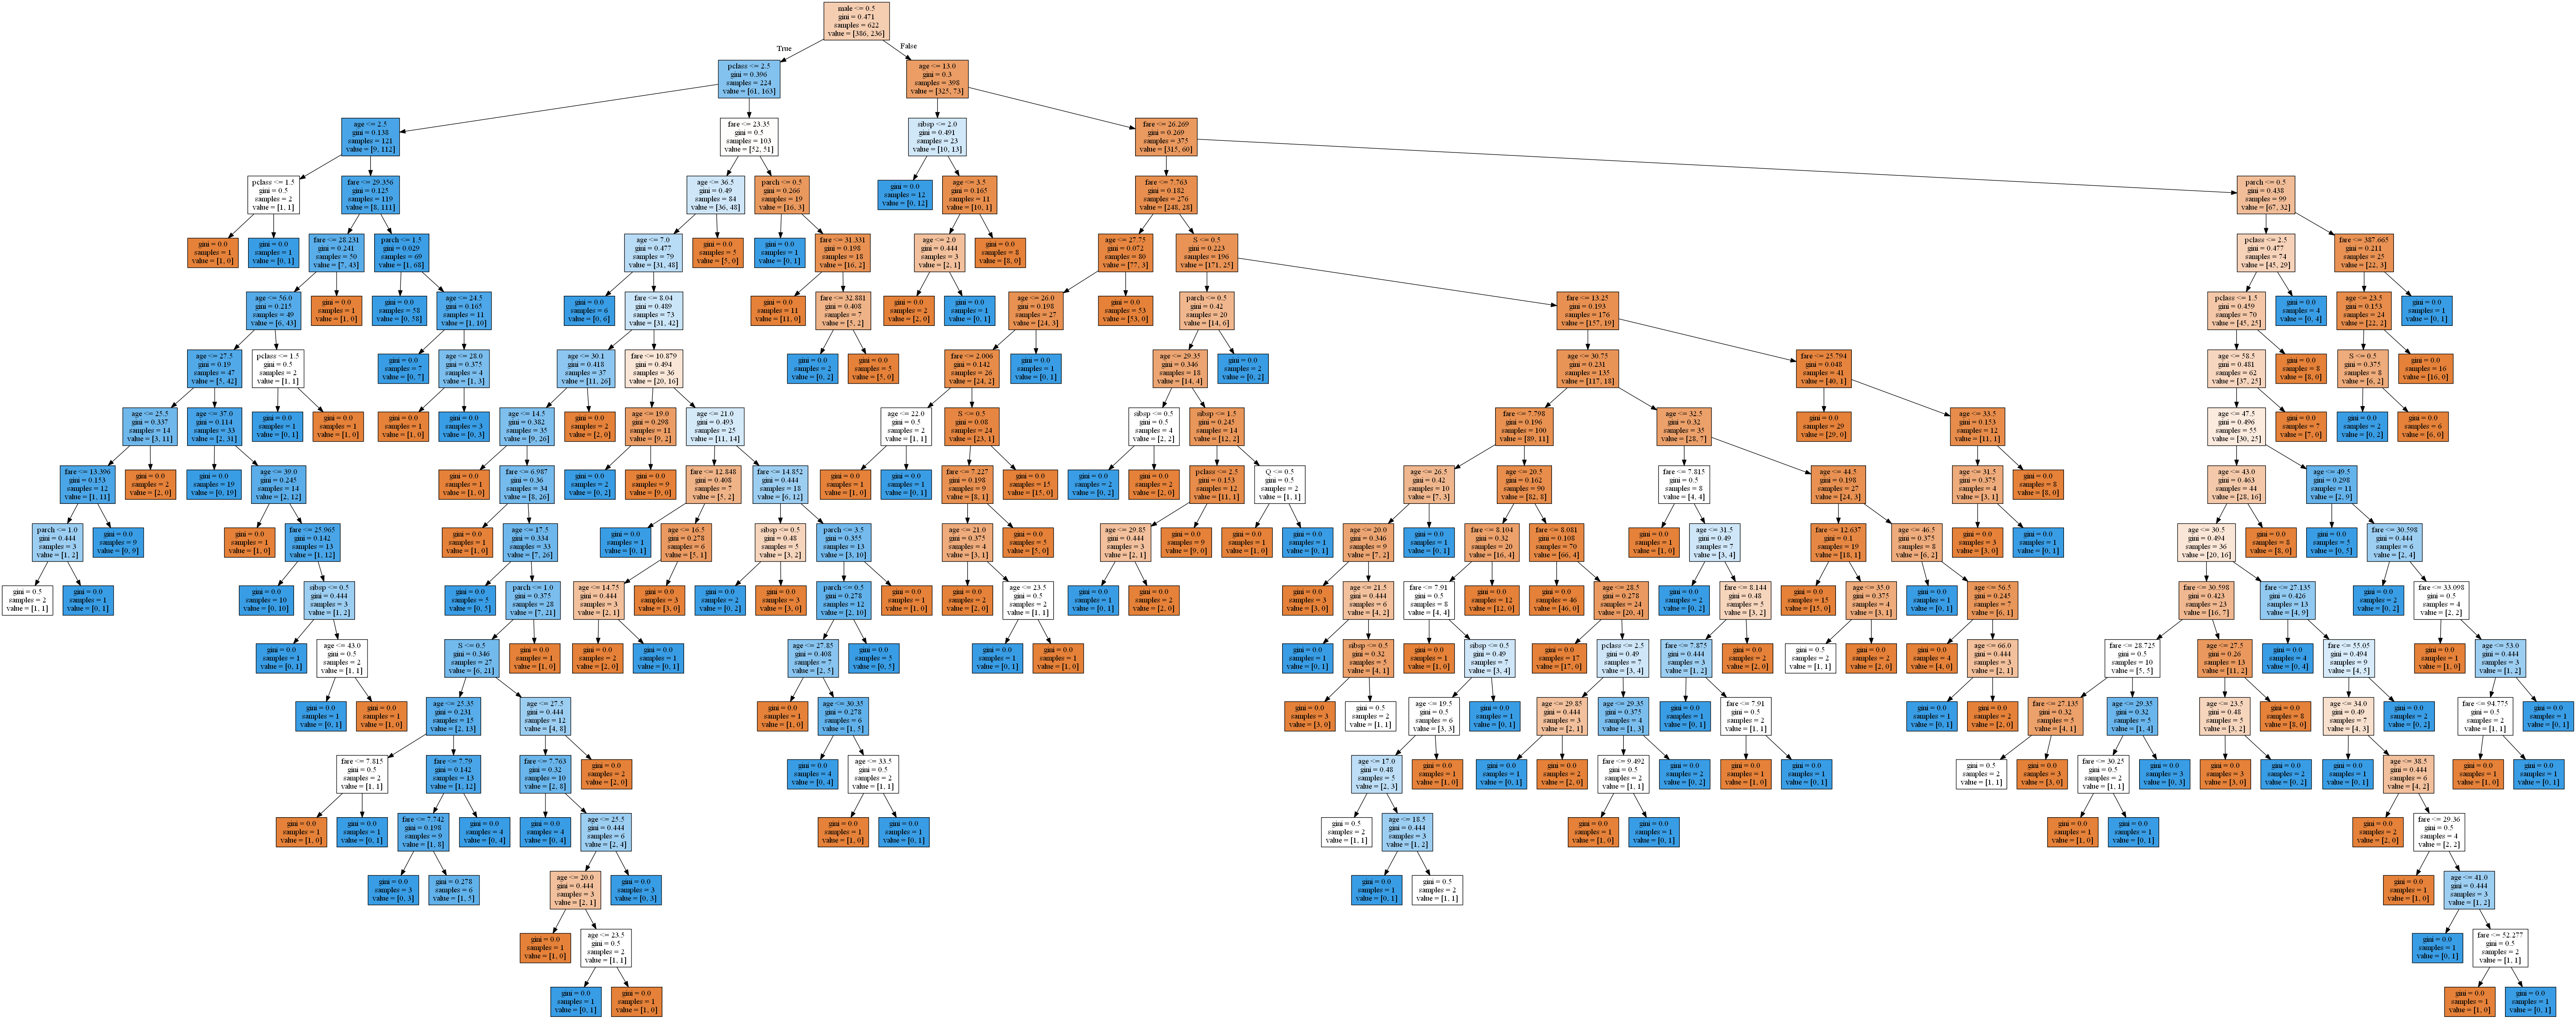

In [99]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True)

graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())